# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Part 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Part 2: Rotation

In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40 #Rotation change between -40 and 40. 
)

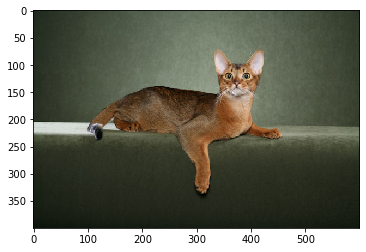

In [3]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


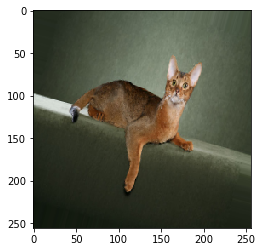

In [4]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8')); #Augmented image

# Part 3: Width and Height Shifts

In [5]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-100, -50, 0, 50, 100],
    height_shift_range = [-50, 0, 50]
)

Found 1 images belonging to 1 classes.


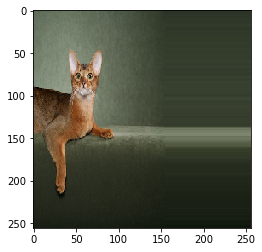

In [6]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Part 4: Brightness

Found 1 images belonging to 1 classes.


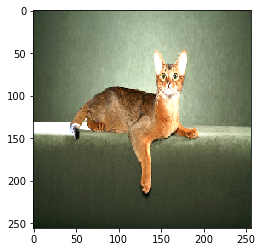

In [7]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.5, 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Part 5: Shear Transformation

Found 1 images belonging to 1 classes.


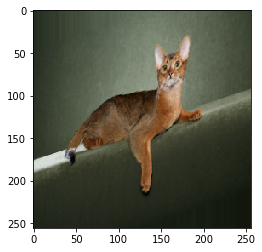

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Part 6: Zoom

Found 1 images belonging to 1 classes.


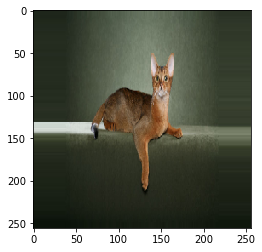

In [9]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = 0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Part 7: Channel Shift

Found 1 images belonging to 1 classes.


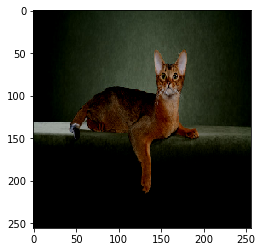

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Part 8: Flips

Found 1 images belonging to 1 classes.


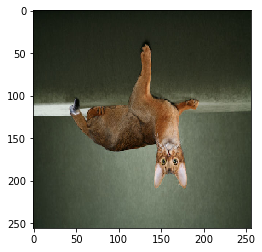

In [15]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Part 9: Normalization

### Featurewise

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)
generator.fit(x_train)

In [24]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.06674969 1.0514283 [[3]]
120.70756512369792


### Samplewise

In [25]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

0.0 1.0 [[2]]


# Part 10: Rescale and Preprocessing Function

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [28]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [29]:
print(x.mean(), x.std(), y)

-0.08214357 0.4099134 [[2]]


# Part 11: Using in Model Training

In [31]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 20)

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False, input_shape= (32, 32, 3),
        pooling = 'avg'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'])

In [ ]:
_ = model.fit(
    generator.flow(x_train, y_train, batch_size = 32),
    epochs = 1,
    steps_per_epoch = 10)